/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


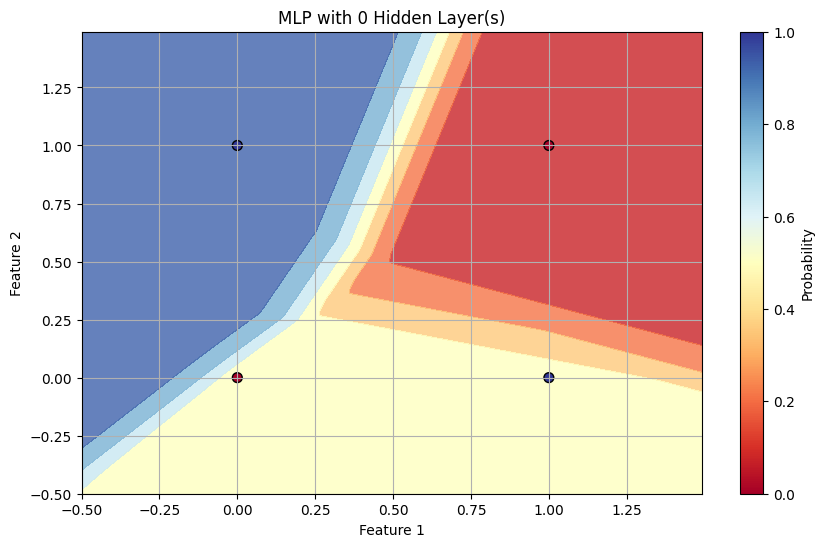

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


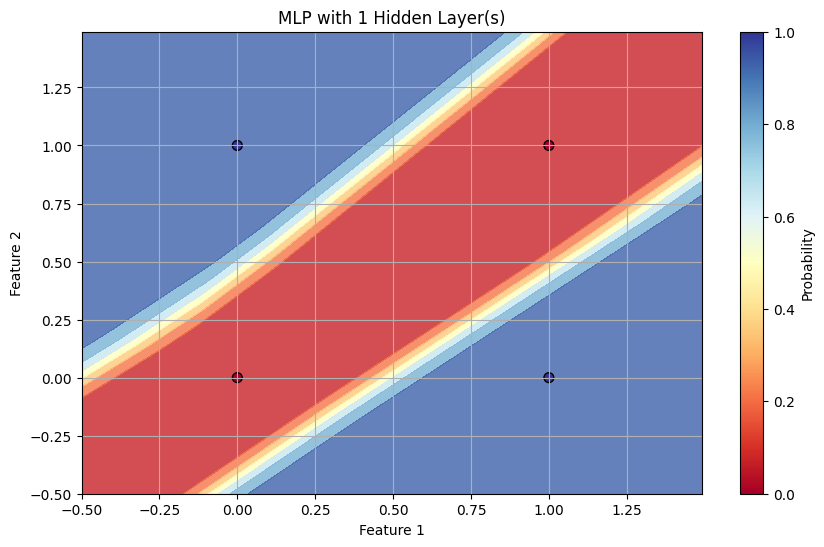

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


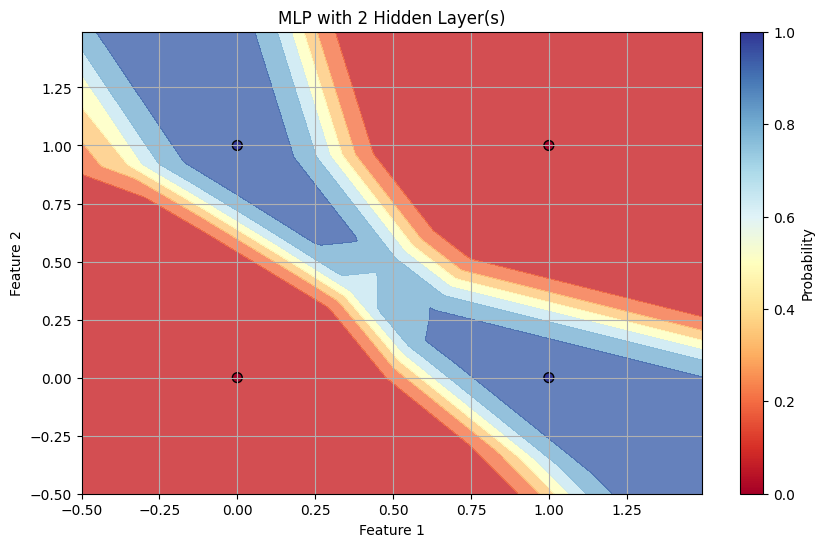

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate synthetic data for classification (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Function to create and train the model
def create_and_train_model(hidden_layers):
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation='relu'))  # Input layer and first hidden layer

    # Add hidden layers
    for _ in range(hidden_layers):
        model.add(Dense(10, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X, y, epochs=1000, verbose=0)

    return model

# Function to plot the decision boundary
def plot_decision_boundary(model, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict for each point in the grid
    probs = model.predict(grid)
    probs = probs.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, probs, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.colorbar(label='Probability')
    plt.show()

# Train and plot models with varying number of hidden layers
for hidden_layers in [0, 1, 2]:
    model = create_and_train_model(hidden_layers)
    plot_decision_boundary(model, f"MLP with {hidden_layers} Hidden Layer(s)")

